# Simple linear regresion

### Import the libraries and the Data set

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [2]:
kchouse = pd.read_csv("kc_house_data.csv")

### Rename the DF Columns

In [3]:
kchouse.columns=["Areaft","Price"]

In [4]:
kchouse.head(10)

,Areaft,Price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0
5,5420,1230000.0
6,1715,257500.0
7,1060,291850.0
8,1780,229500.0
9,1890,323000.0


Use train split to separate our data in for trainin and proof data (75-25)

In [7]:
X_train, X_test, y_train, y_test= train_test_split(kchouse.Areaft.values.reshape(-1,1), kchouse.Price.values,random_state=11)

In [8]:
X_train.shape

(16209, 1)

In [9]:
X_test.shape

(5404, 1)

Create the estimator

In [12]:
reglin=LinearRegression()

Make the Fit

In [13]:
reglin.fit(X=X_train,y=y_train)

LinearRegression()

Coeficient

In [14]:
reglin.coef_

array([283.3312025])

In [16]:
reglin.intercept_

-47648.88872213906

Evaluate the model

In [17]:
prediction=reglin.predict(X_test)

In [18]:
expected=y_test

Check the values prediction vs expected

In [24]:
for p,e in zip(prediction[::200],expected[::200]):
    print(f'Predicted: {p:.2f}, -----> {e:.2f} :Expected')

Predicted: 264015.43, -----> 343566.00 :Expected
Predicted: 623846.06, -----> 530000.00 :Expected
Predicted: 510513.58, -----> 499000.00 :Expected
Predicted: 295748.53, -----> 340000.00 :Expected
Predicted: 221515.75, -----> 137000.00 :Expected
Predicted: 660679.12, -----> 646000.00 :Expected
Predicted: 884510.77, -----> 775000.00 :Expected
Predicted: 584179.69, -----> 334950.00 :Expected
Predicted: 349014.79, -----> 230000.00 :Expected
Predicted: 298015.18, -----> 940000.00 :Expected
Predicted: 533180.08, -----> 353500.00 :Expected
Predicted: 638012.62, -----> 380000.00 :Expected
Predicted: 538846.70, -----> 880000.00 :Expected
Predicted: 445347.40, -----> 580000.00 :Expected
Predicted: 402847.72, -----> 274000.00 :Expected
Predicted: 419847.60, -----> 610000.00 :Expected
Predicted: 397181.10, -----> 998500.00 :Expected
Predicted: 346181.48, -----> 230000.00 :Expected
Predicted: 638012.62, -----> 675000.00 :Expected
Predicted: 351848.11, -----> 530000.00 :Expected
Predicted: 320681.67

We can notice that the prediction considering just the Area in ft is not accurate as we expect

Create the prediction model

In [25]:
predict=(lambda  x:reglin.coef_*x+reglin.intercept_)

In [26]:
predict(770)

array([170516.13720049])

In [27]:
predict(1160)

array([281015.30617429])

Graph of the linear fuction

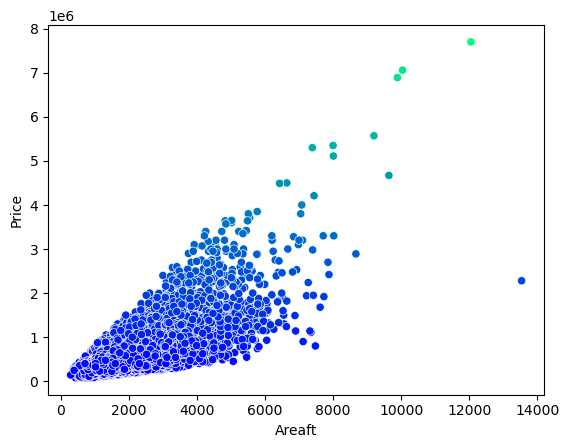

In [40]:
axes = sns.scatterplot(data=kchouse, x="Areaft", y="Price", hue="Price", palette="winter", legend=False)

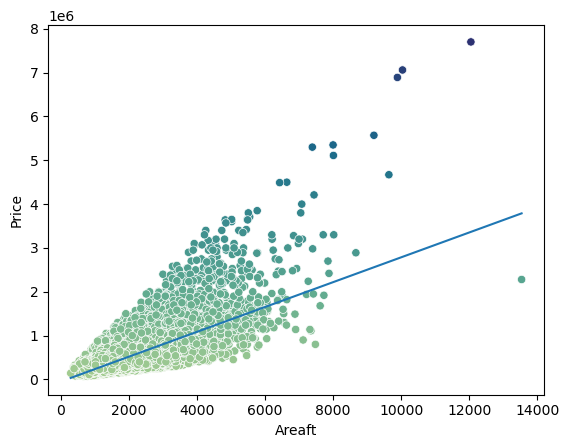

In [45]:
axes = sns.scatterplot(data=kchouse, x="Areaft", y="Price", hue="Price", palette="crest", legend=False)

x = np.array([min(kchouse.Areaft.values), max(kchouse.Areaft.values)])
y = predict(x)

line = plt.plot(x,y)

### Multiple Linear Regresion

Import the dataset

In [48]:
from sklearn.datasets import fetch_california_housing

In [53]:
california = fetch_california_housing()

In [54]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [55]:
california.data.shape

(20640, 8)

In [56]:
california.target.shape

(20640,)

In [58]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [60]:
pd.set_option("display.float_format", "{:.4f}".format)

In [62]:
pd.set_option("display.max_columns", 9)

In [63]:
pd.set_option("display.width", None)

Transform the data into a DataFrame

In [64]:
california_df=pd.DataFrame(california.data,columns=california.feature_names)

In [65]:
california_df['PriceHouse'] = pd.Series(california.target)

In [66]:
california_df.head(20)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PriceHouse
0,8.3252,41.0000,6.9841,1.0238,322.0000,2.5556,37.8800,-122.2300,4.5260
1,8.3014,21.0000,6.2381,0.9719,2401.0000,2.1098,37.8600,-122.2200,3.5850
2,7.2574,52.0000,8.2881,1.0734,496.0000,2.8023,37.8500,-122.2400,3.5210
3,5.6431,52.0000,5.8174,1.0731,558.0000,2.5479,37.8500,-122.2500,3.4130
4,3.8462,52.0000,6.2819,1.0811,565.0000,2.1815,37.8500,-122.2500,3.4220
5,4.0368,52.0000,4.7617,1.1036,413.0000,2.1399,37.8500,-122.2500,2.6970
6,3.6591,52.0000,4.9319,0.9514,1094.0000,2.1284,37.8400,-122.2500,2.9920
7,3.1200,52.0000,4.7975,1.0618,1157.0000,1.7883,37.8400,-122.2500,2.4140
8,2.0804,42.0000,4.2941,1.1176,1206.0000,2.0269,37.8400,-122.2600,2.2670
9,3.6912,52.0000,4.9706,0.9902,1551.0000,2.1723,37.8400,-122.2500,2.6110


In [67]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PriceHouse
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


### Graph the Data

We generate a 10% sample with the _sample_ function

In [68]:
sampledf=california_df.sample(frac=0.1, random_state=17)

In [69]:
sns.set(font_scale =2)

In [70]:
sns.set_style("whitegrid")

We gonna compare the relation of each Feature with the House price

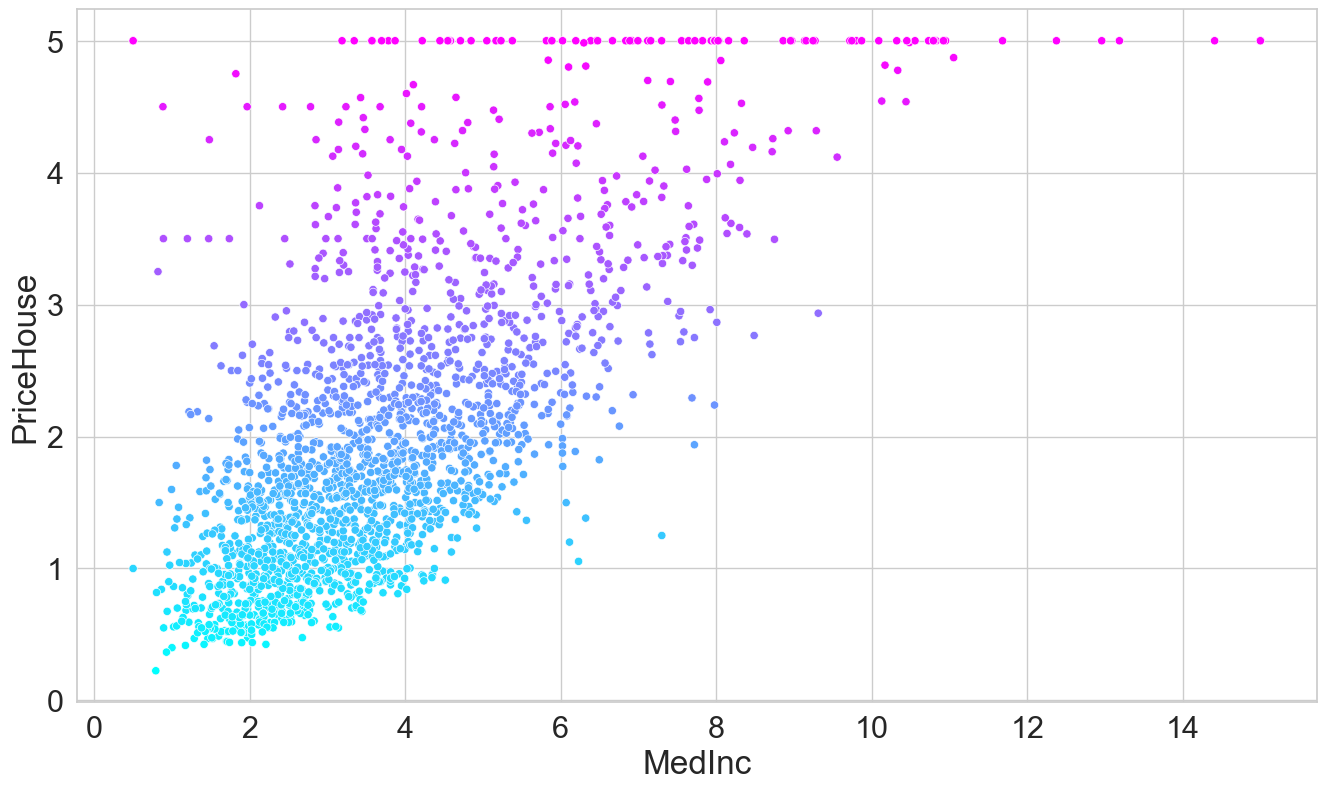

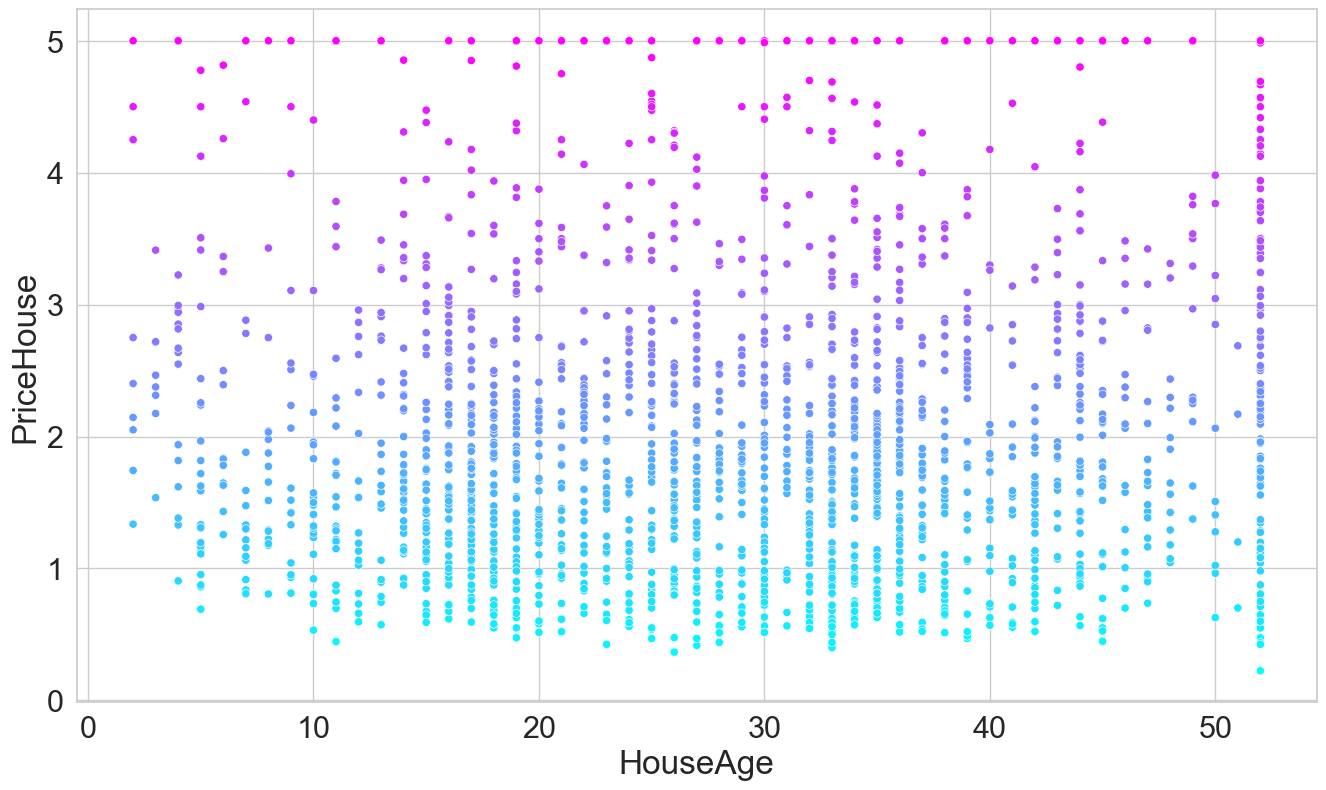

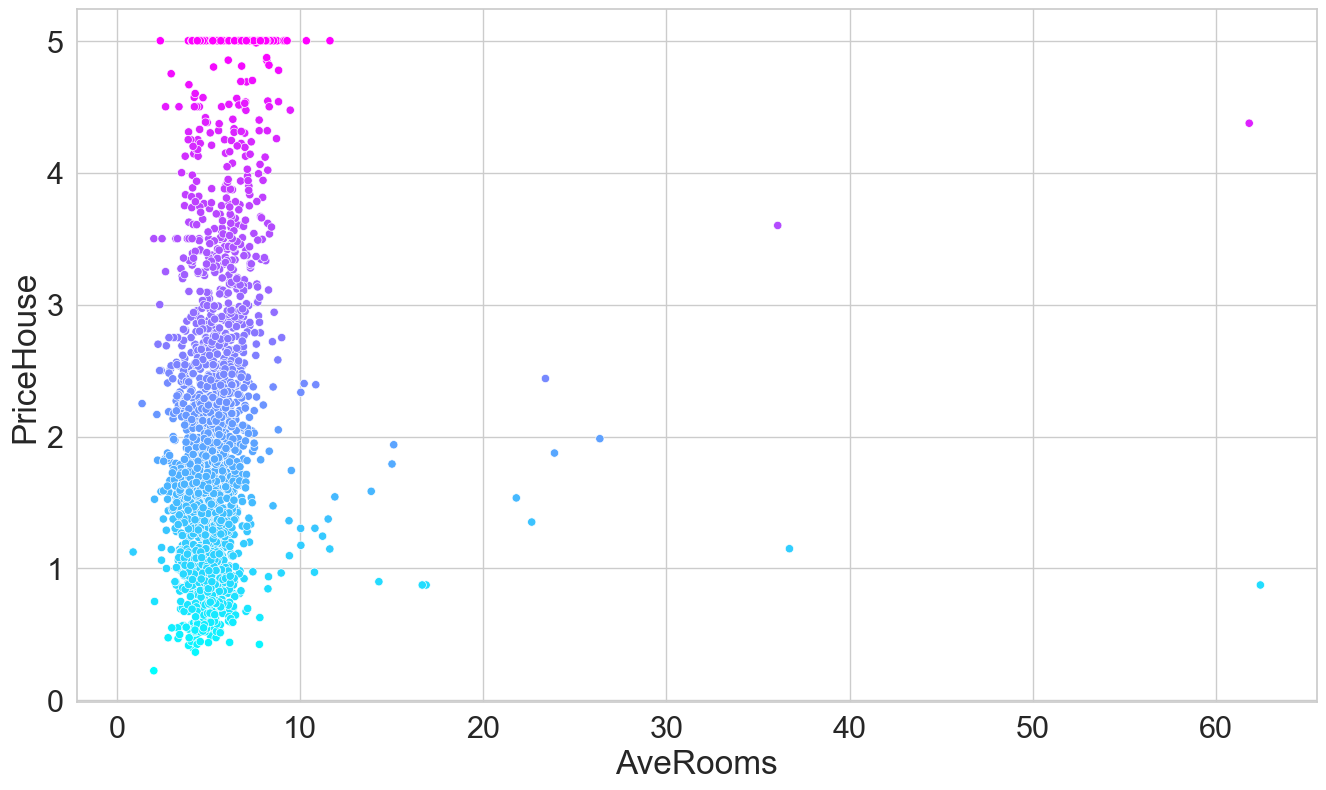

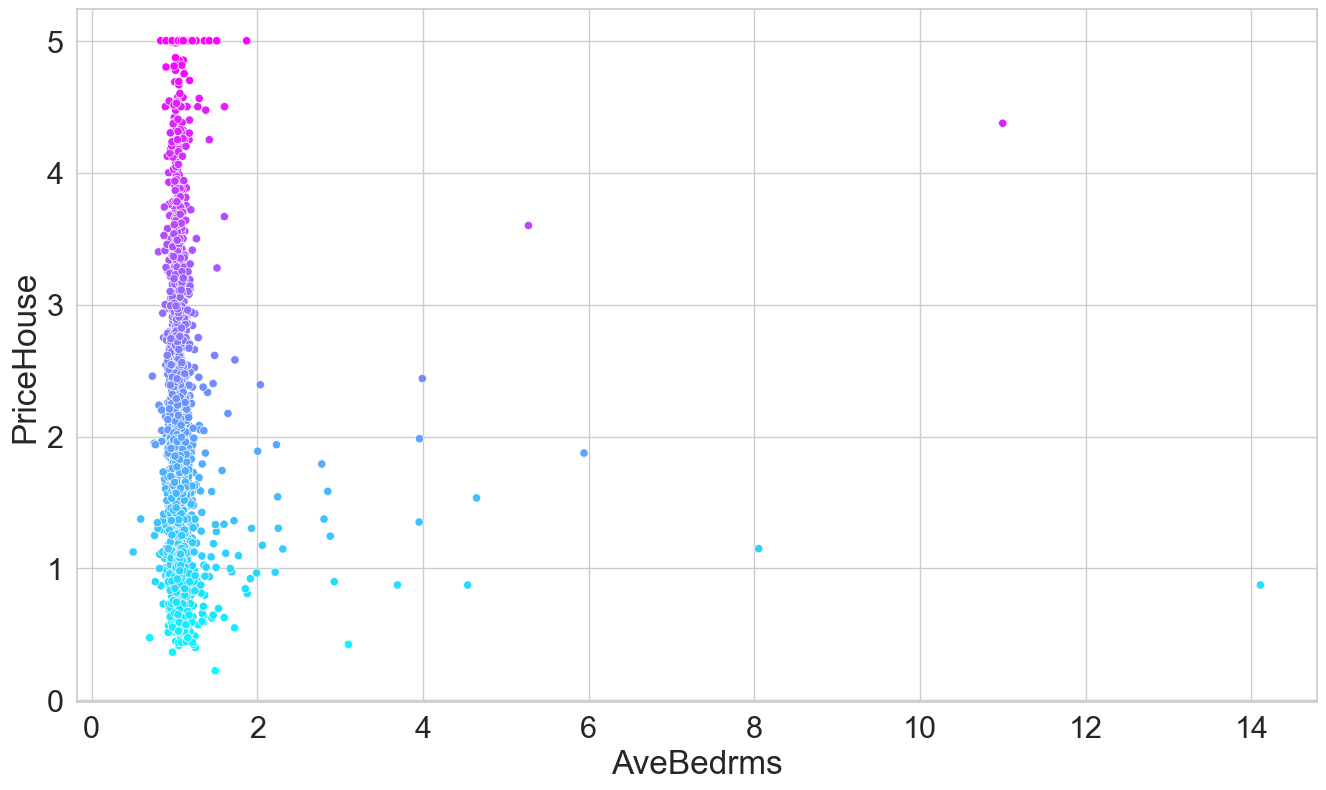

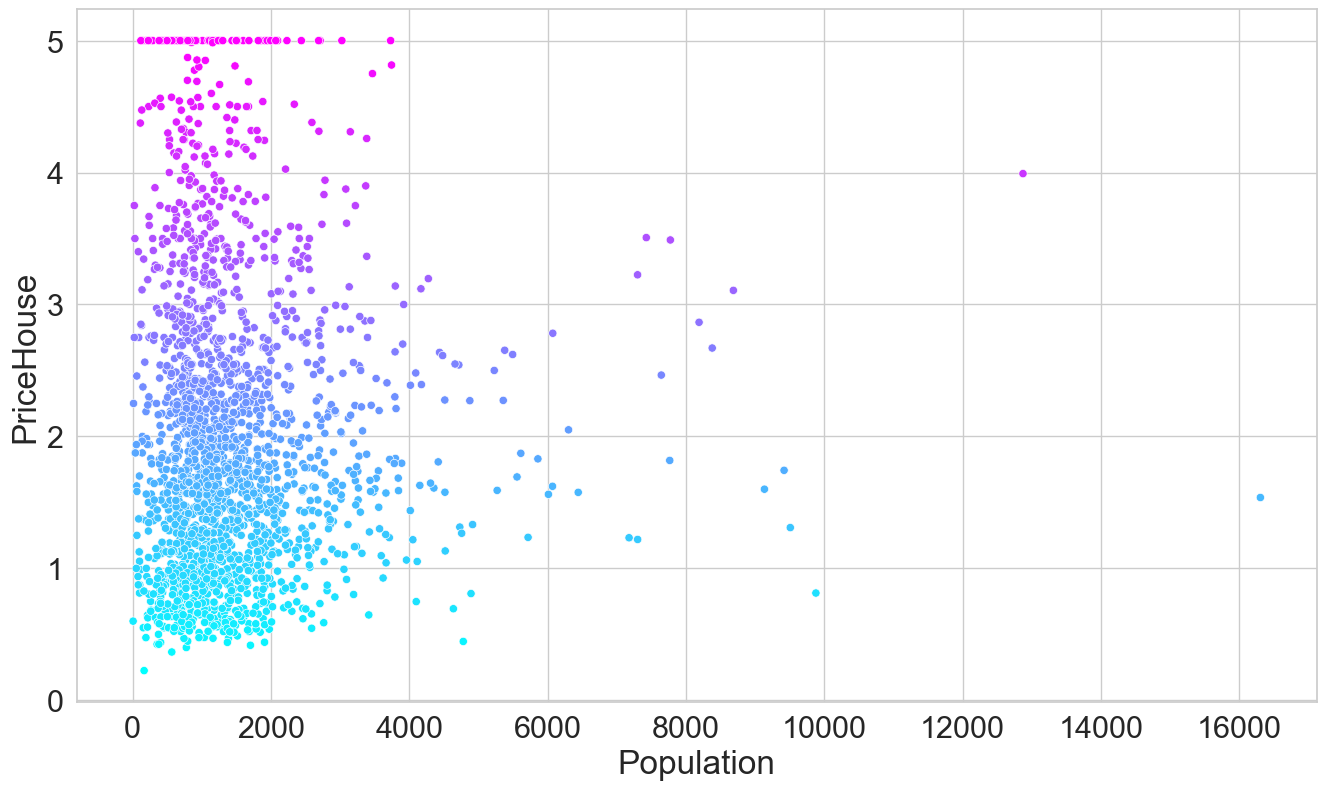

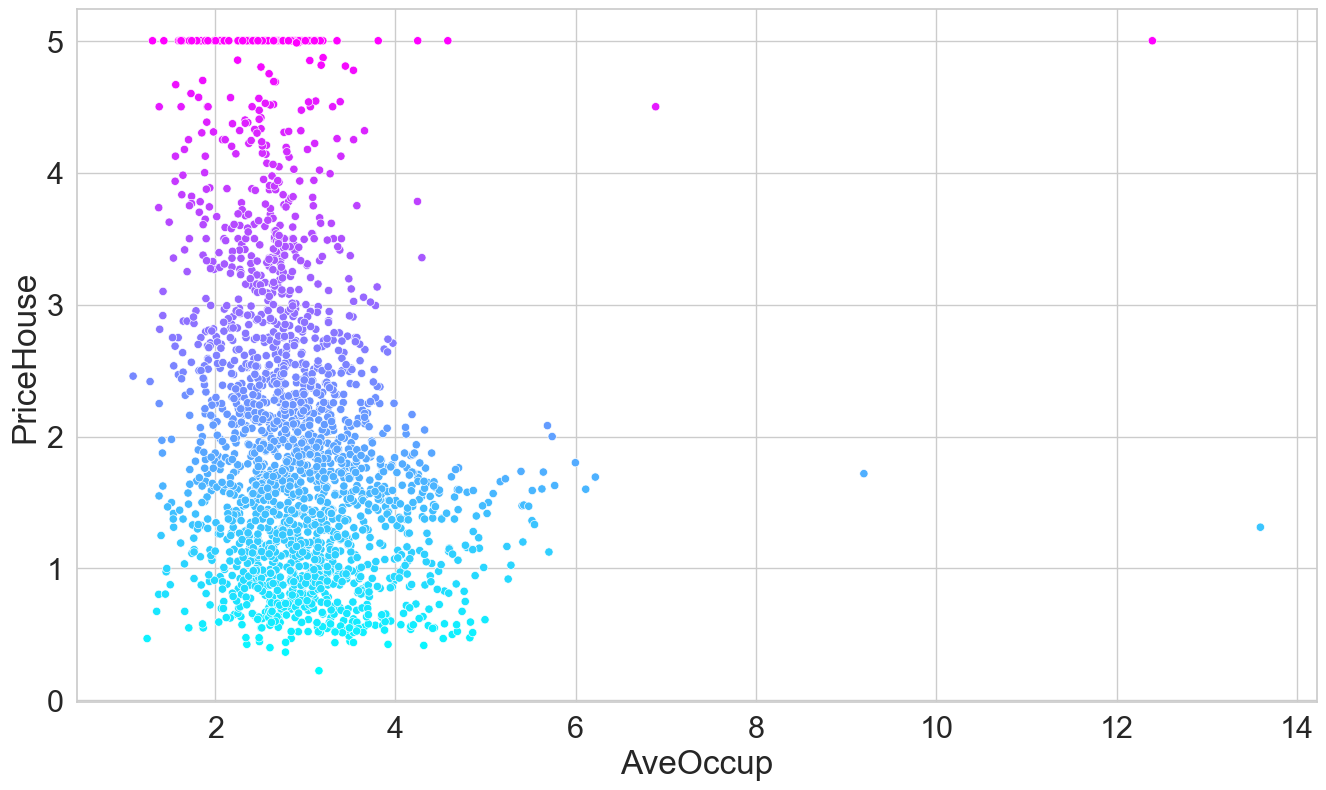

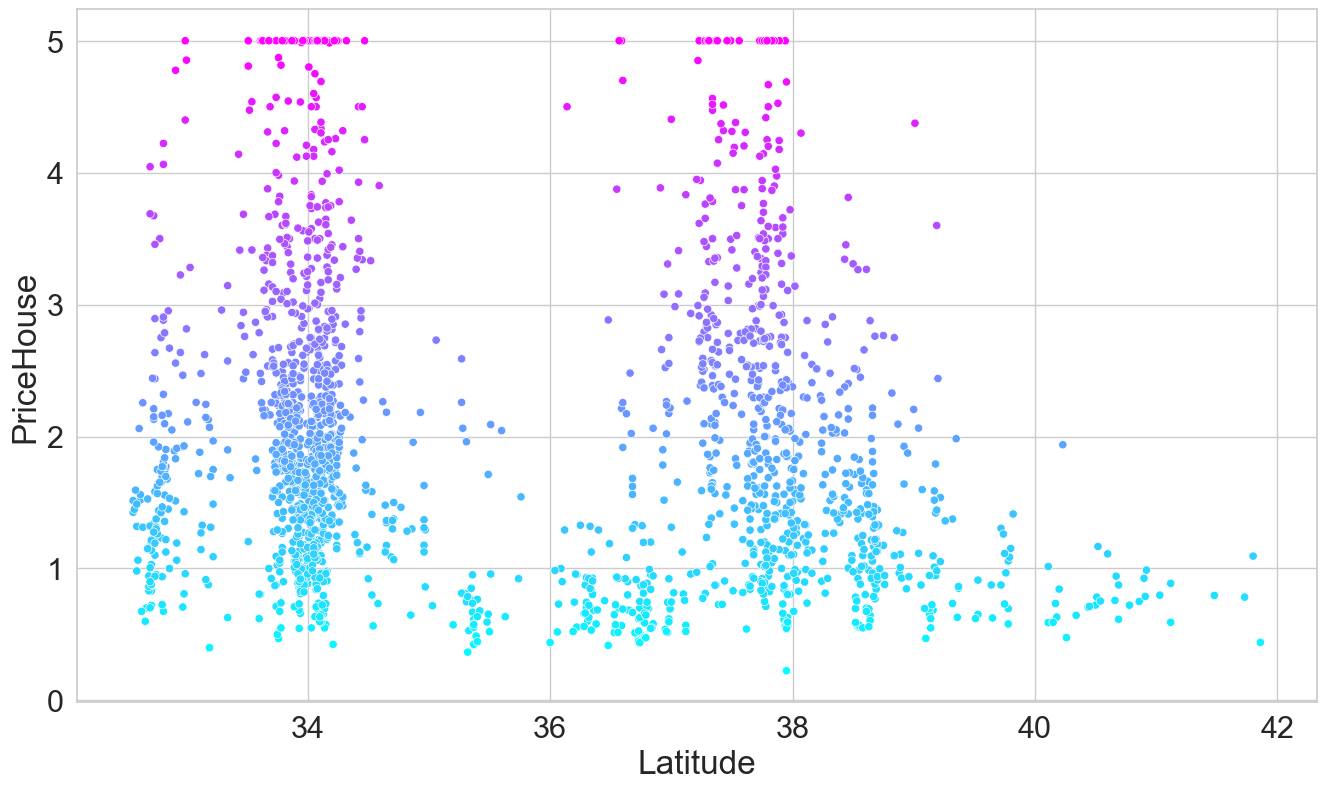

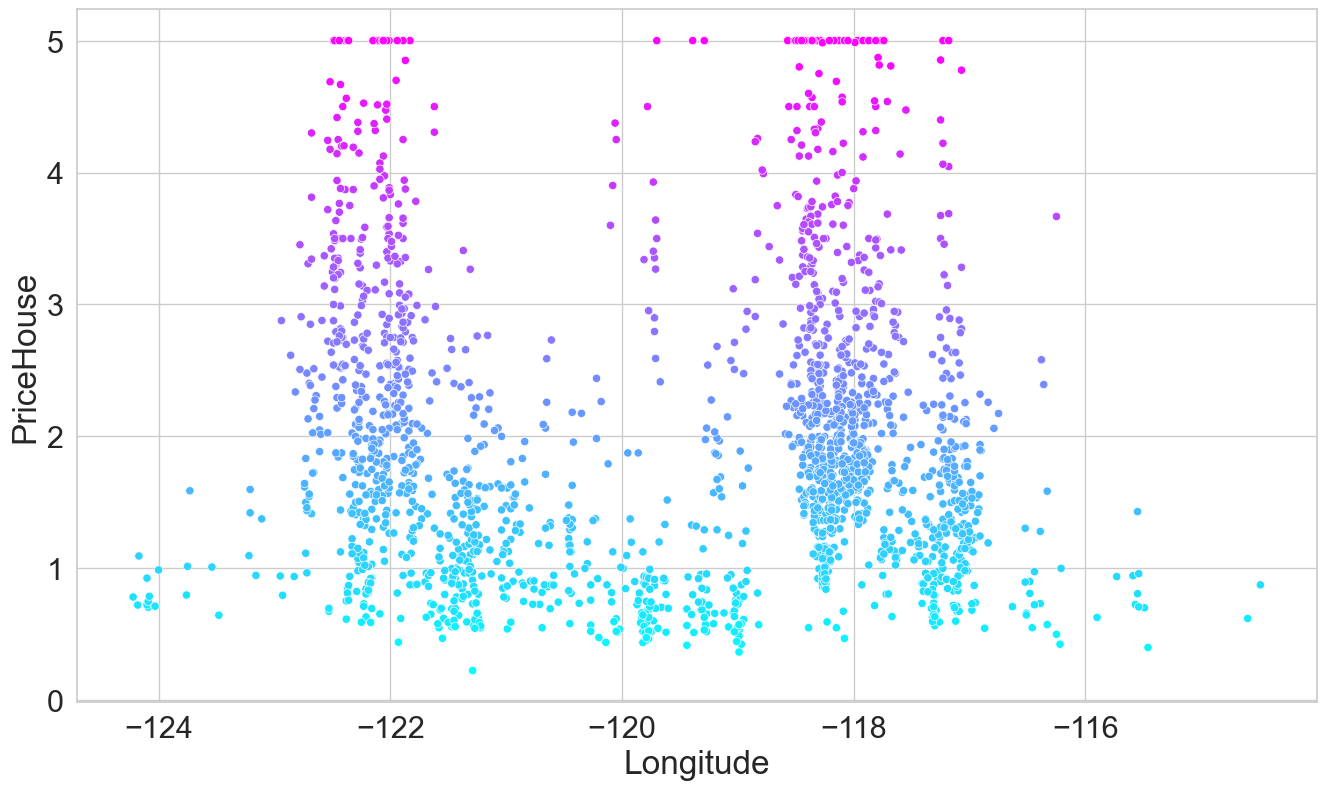

In [72]:
for feature in california.feature_names:
    plt.figure(figsize=(16,9))
    sns.scatterplot(data=sampledf, x=feature, y="PriceHouse", hue="PriceHouse", palette="cool", legend=False)

Another way to graph the data

C:\Users\don_q\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


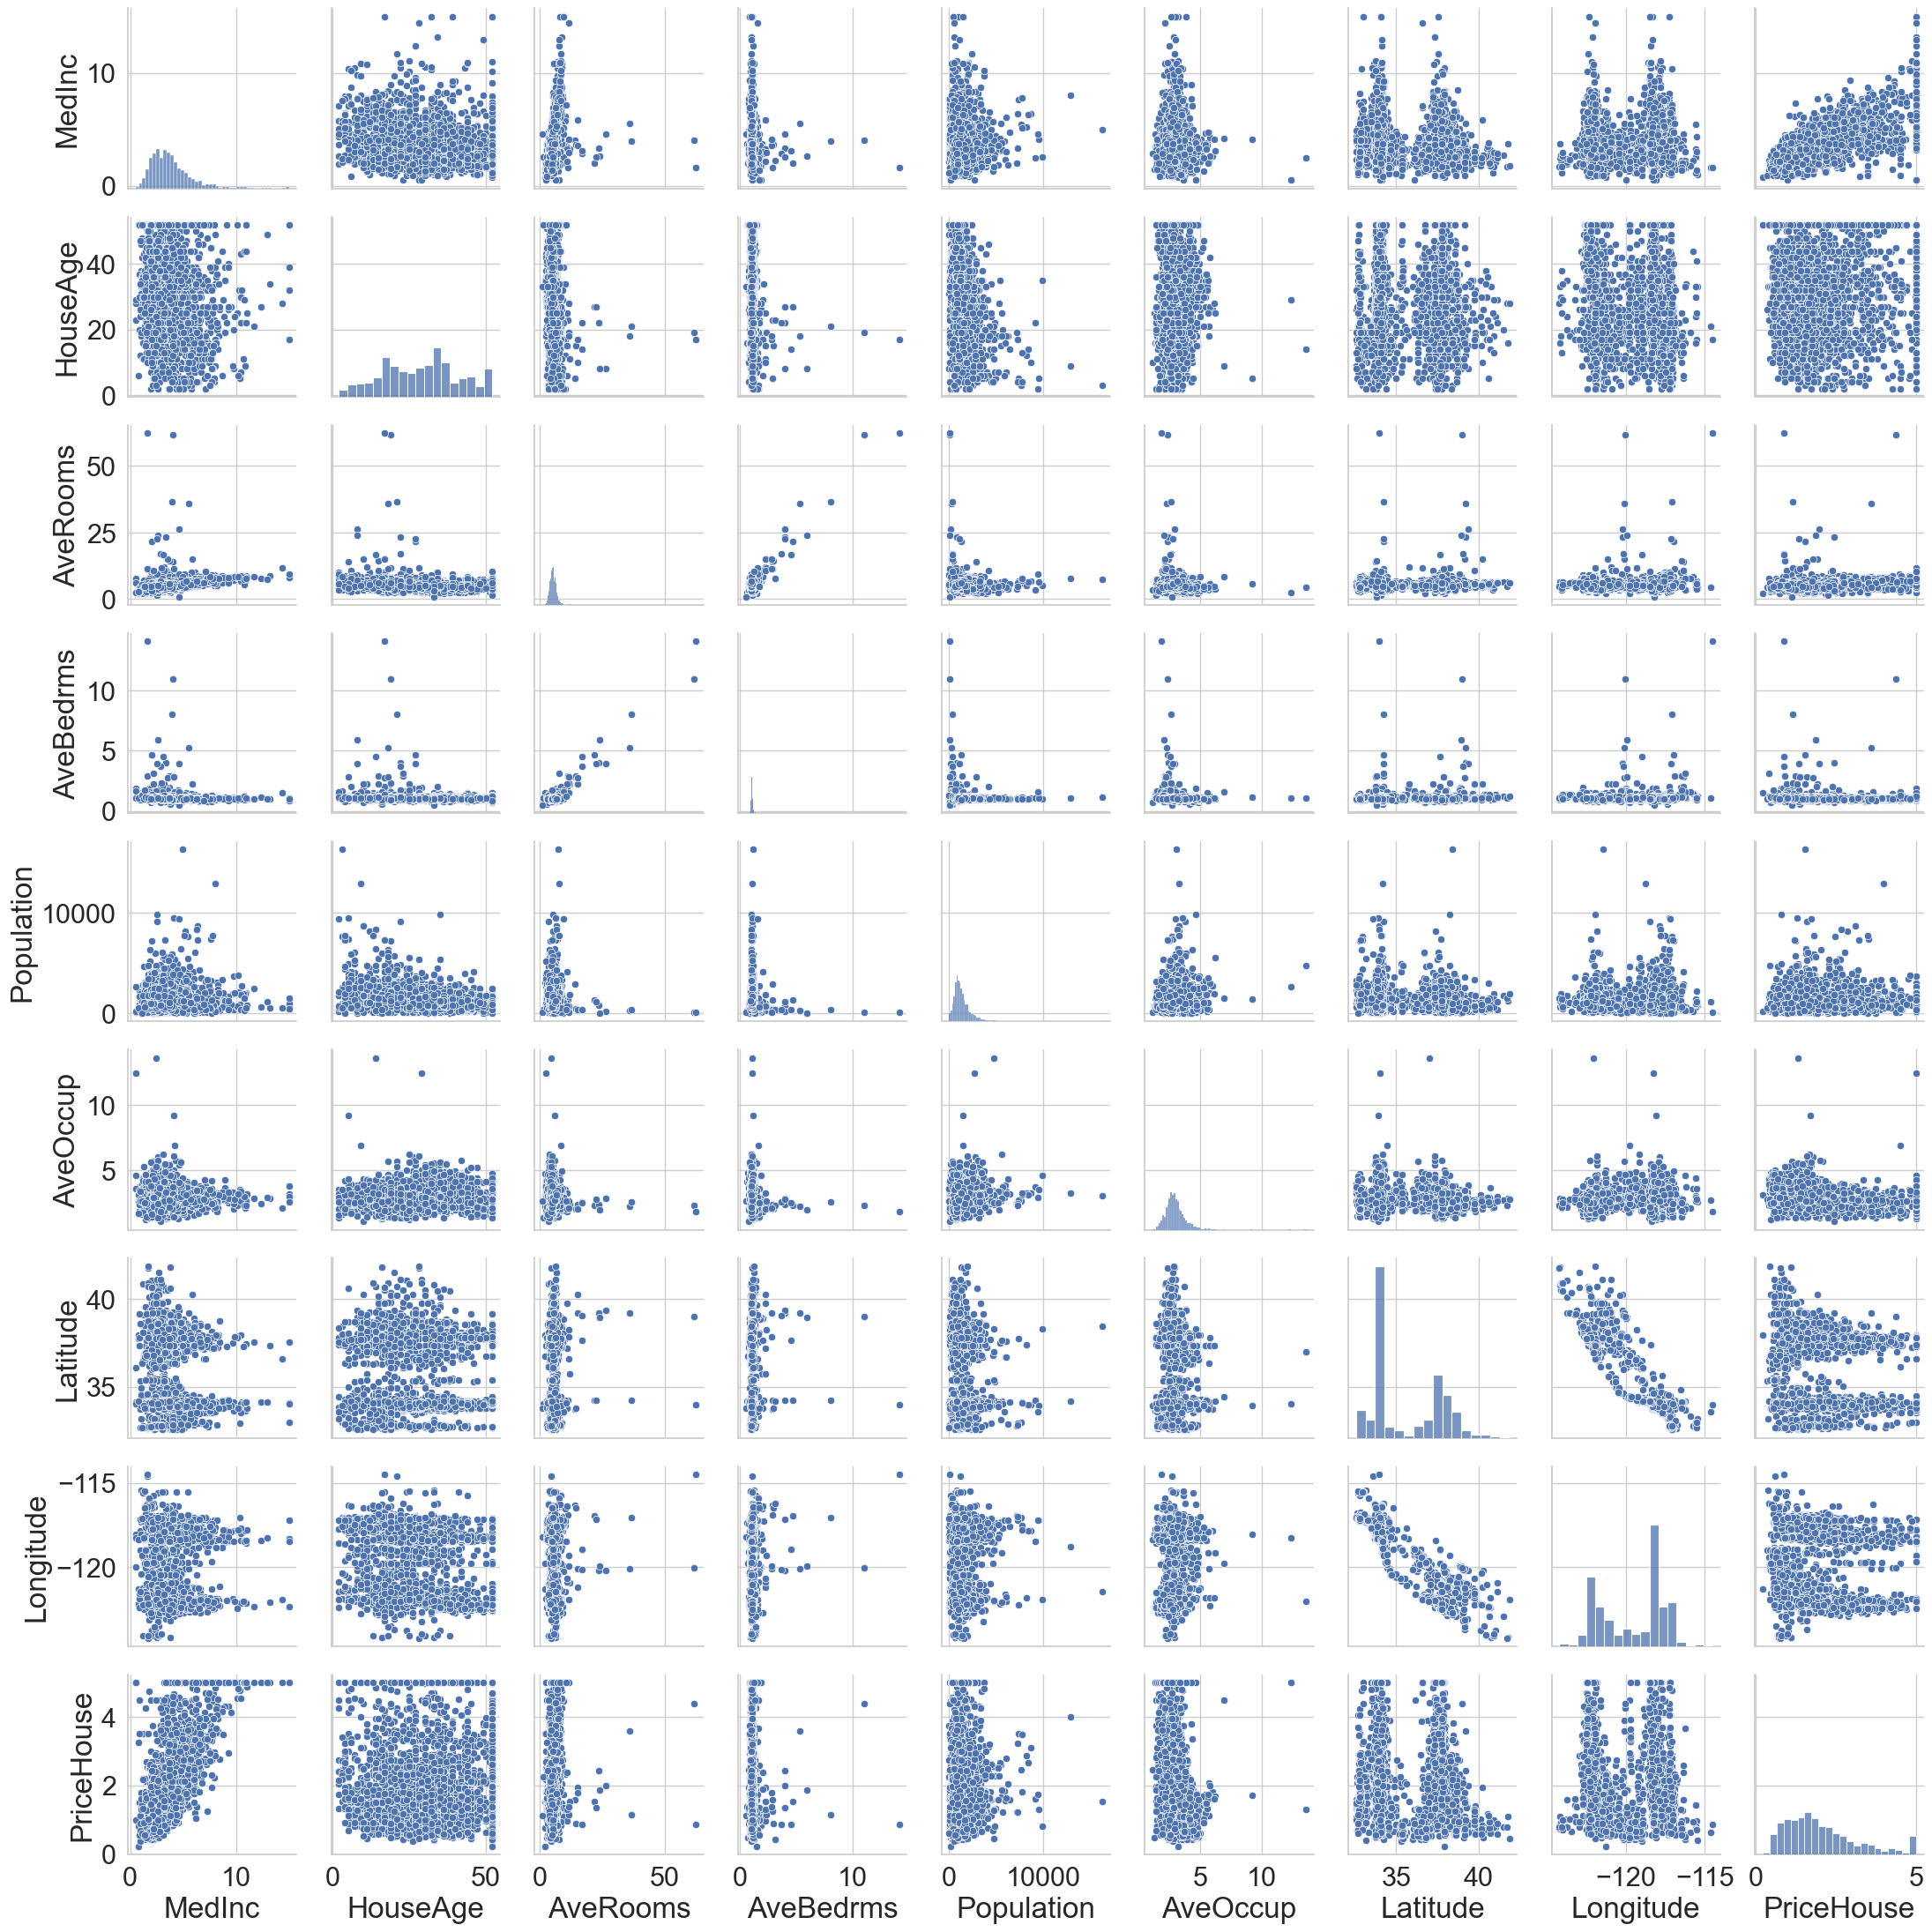

In [78]:
sns.pairplot(sampledf)

## Create the model 

Separate the data in 2 groups, train and test with _train_test_split function_

In [79]:
X_train,X_test,y_train,y_test=train_test_split(california.data, california.target,random_state=11)

In [80]:
X_train.shape

(15480, 8)

In [81]:
X_test.shape

(5160, 8)

Train the model

In [82]:
reglin=LinearRegression()

In [83]:
reglin.fit(X=X_train,y=y_train)

LinearRegression()

In [84]:
for i, name in enumerate(california.feature_names):
    print(f'{name:>10}: {reglin.coef_[i]}') 

    MedInc: 0.4377030215382211
  HouseAge: 0.009216834565797735
  AveRooms: -0.10732526637361046
 AveBedrms: 0.6117133073918108
Population: -5.75682200931564e-06
  AveOccup: -0.0033845664657162827
  Latitude: -0.4194818609649075
 Longitude: -0.4337713349874005


In [85]:
reglin.intercept_

-36.8829506560553

### Test the model

In [87]:
Predict_cal=reglin.predict(X_test)

In [88]:
Expect_cal=y_test

Compare the values 

In [91]:
for p,e in zip(Predict_cal[::300],Expect_cal[::300]):
    print(f'Predicted: {p:.2f}, -----> {e:.2f} :Expected')

Predicted: 1.25, -----> 0.76 :Expected
Predicted: 2.14, -----> 1.27 :Expected
Predicted: 1.47, -----> 2.17 :Expected
Predicted: 0.50, -----> 2.13 :Expected
Predicted: 4.44, -----> 5.00 :Expected
Predicted: 2.60, -----> 2.15 :Expected
Predicted: 1.58, -----> 1.61 :Expected
Predicted: 0.39, -----> 0.72 :Expected
Predicted: 1.60, -----> 2.21 :Expected
Predicted: 2.48, -----> 1.83 :Expected
Predicted: 2.07, -----> 2.98 :Expected
Predicted: 2.37, -----> 1.62 :Expected
Predicted: 2.04, -----> 1.87 :Expected
Predicted: 1.50, -----> 1.89 :Expected
Predicted: 0.49, -----> 1.05 :Expected
Predicted: 2.85, -----> 1.97 :Expected
Predicted: 3.33, -----> 3.41 :Expected
Predicted: 1.70, -----> 1.78 :Expected


Graph the Predicted and the expected values

In [94]:
df=pd.DataFrame()

In [95]:
df["Expect_cal"]=pd.Series(Expect_cal)

In [96]:
df["Predict_cal"]=pd.Series(Predict_cal)

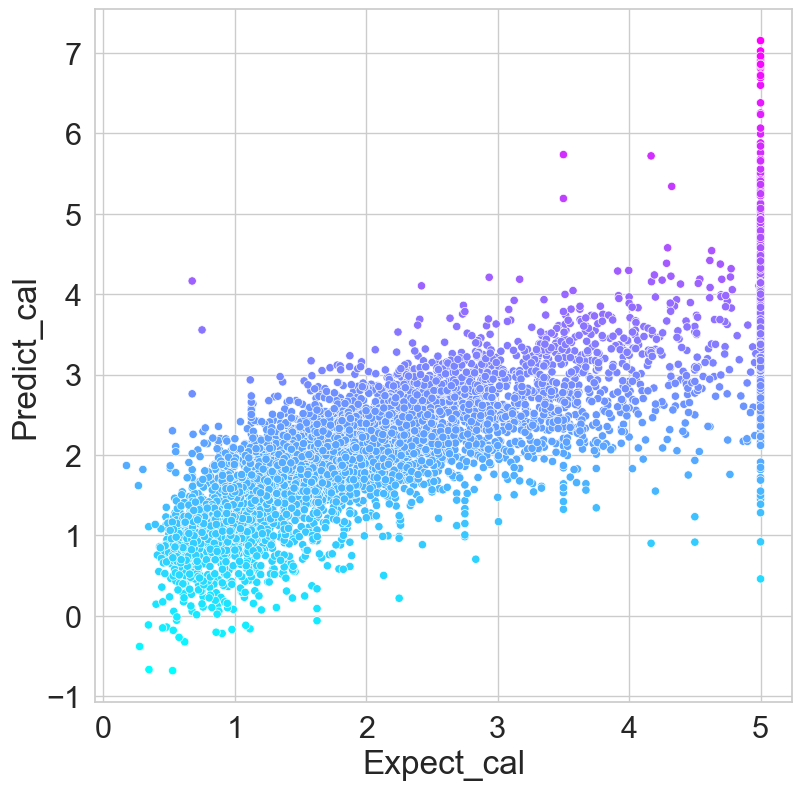

In [101]:
figure=plt.figure(figsize=(9,9))

axes=sns.scatterplot(data=df,x="Expect_cal",y="Predict_cal", hue="Predict_cal", palette="cool",legend=False)


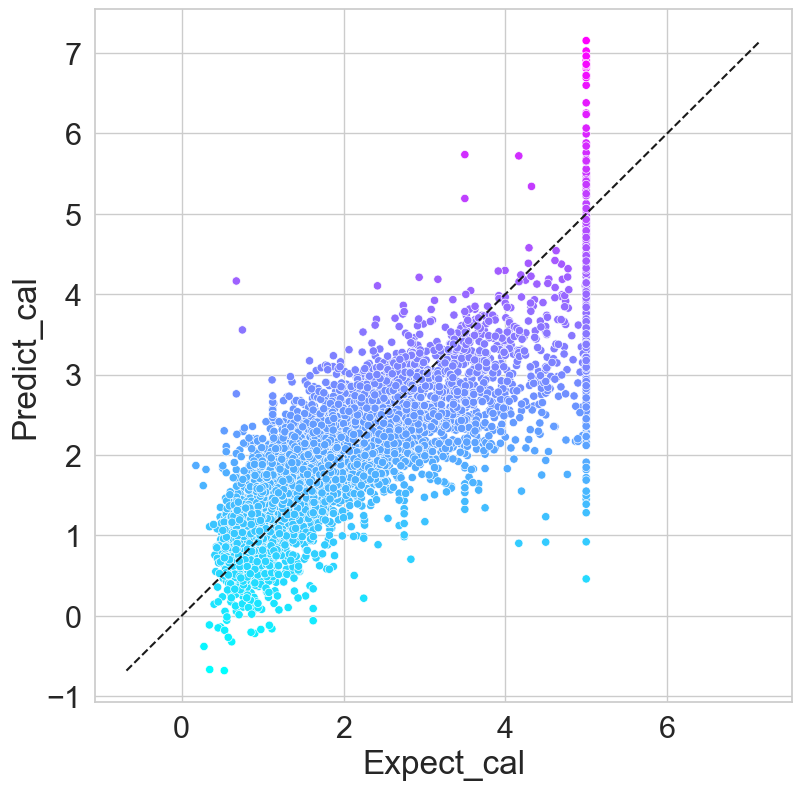

In [105]:
figure=plt.figure(figsize=(9,9))

axes=sns.scatterplot(data=df,x="Expect_cal",y="Predict_cal", hue="Predict_cal", palette="cool",legend=False)

start = min(Expect_cal.min(),Predict_cal.min())
end = max(Expect_cal.max(),Predict_cal.max())

line=plt.plot([start,end],[start,end], 'k--')

### Metrics

obtain statistical values to analyze our previous results

In [108]:
metrics.r2_score(Expect_cal,Predict_cal)

0.6008983115964333

Mean Squared Error

In [109]:
metrics.mean_squared_error(Expect_cal,Predict_cal)

0.5350149774449119

### Compare with other models

In [112]:
Estimators={"Reglin":LinearRegression(),"ElasticNet":ElasticNet(),"Lasso":Lasso(),"Ridge":Ridge()}

In [119]:
for promest, objest in Estimators.items():
    Kfold=KFold(n_splits=10, random_state=11, shuffle=True)
    scores=cross_val_score(estimator=objest, X=california.data, y=california.target, cv=Kfold, scoring="r2")
    print(f'{promest:>16}:' + f' Score average R2={scores.mean():.3f}')

          Reglin: Score average R2=0.599
      ElasticNet: Score average R2=0.423
           Lasso: Score average R2=0.285
           Ridge: Score average R2=0.599
